In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [21]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [22]:
img_width = 180
img_height =180 

In [23]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 9700 files belonging to 5 classes.


In [24]:
data_cat = data_train.class_names

In [25]:
data_cat

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']

In [26]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 200 files belonging to 5 classes.


In [27]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 100 files belonging to 5 classes.


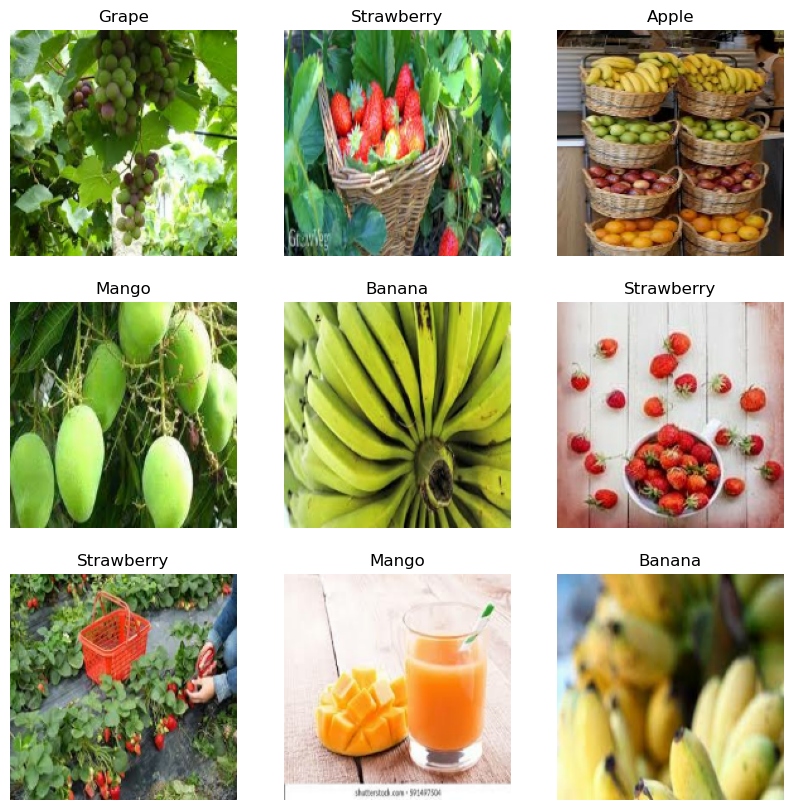

In [28]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [32]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 61s 191ms/step - accuracy: 0.4035 - loss: 1.7614 - val_accuracy: 0.5800 - val_loss: 1.0934
Epoch 2/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 59s 194ms/step - accuracy: 0.5765 - loss: 1.0674 - val_accuracy: 0.6200 - val_loss: 0.9771
Epoch 3/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 69s 226ms/step - accuracy: 0.6399 - loss: 0.9291 - val_accuracy: 0.6350 - val_loss: 1.0009
Epoch 4/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 63s 207ms/step - accuracy: 0.6834 - loss: 0.8395 - val_accuracy: 0.6400 - val_loss: 0.9744
Epoch 5/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 68s 225ms/step - accuracy: 0.7399 - loss: 0.7094 - val_accuracy: 0.6650 - val_loss: 1.0804
Epoch 6/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 64s 209ms/step - accuracy: 0.7734 - loss: 0.6283 - val_accuracy: 0.5750 - val_loss: 1.4340
Epoch 7/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 63s 208ms/step - accuracy: 0.8142 - loss: 0.5194 - val_accuracy: 0.5950 - val_loss: 1.3504
Epoch 8/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 186ms/step - accuracy: 0.8356 - loss: 0

Text(0.5, 1.0, 'Loss')

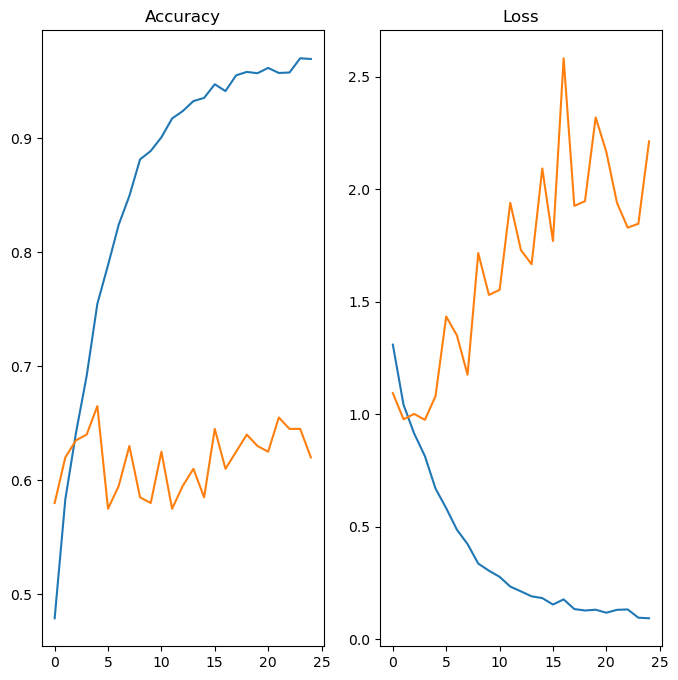

In [34]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [44]:
image = 'banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [45]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [46]:
score = tf.nn.softmax(predict)

In [49]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is Banana with accuracy of 100.00


In [51]:
model.save('Image_classify.keras')
model

<Sequential name=sequential, built=True>